In [1]:
import numpy as np
np.random.seed(123)  # for reproducibility

#keras model module
from keras.models import Sequential

#ceras core layers
from keras.layers import Dense, Dropout, Activation, Flatten

#cnn layars
from keras.layers import Convolution2D, MaxPooling2D

Using TensorFlow backend.
E:\Anaconda\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\Anaconda\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\Anaconda\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\Anaconda\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:519: Fu

In [2]:
from keras.utils import np_utils

In [3]:
#Load image data from MNIST.
from keras.datasets import mnist

In [4]:
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print (X_train.shape)
# (60000, 28, 28)

(60000, 28, 28)


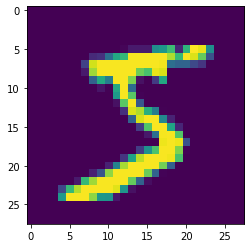

In [5]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0])

In [6]:
#Reshape input dataPython

X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:

print (y_train.shape)
print (y_train[:10])

(60000,)
[5 0 4 1 9 2 1 3 1 4]


In [9]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10);
Y_test = np_utils.to_categorical(y_test, 10);

print (Y_train.shape)

(60000, 10)


In [10]:
#Declare Sequential modelPython

model = Sequential()

In [11]:
#CNN input layerPython
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,28,28), data_format='channels_first') )

print (model.output_shape)
# (None, 32, 26, 26)

(None, 32, 26, 26)


In [12]:

model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [13]:
#Compile modelPython
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
#Fit Keras modelPython

model.fit(X_train, Y_train, 
          batch_size=32, epochs=10, verbose=1)


Epoch 1/10
60000/60000 [==============================] - 53s 886us/step - loss: 0.2469 - accuracy: 0.9245
Epoch 2/10
60000/60000 [==============================] - 54s 901us/step - loss: 0.0990 - accuracy: 0.9711
Epoch 3/10
60000/60000 [==============================] - 53s 884us/step - loss: 0.0773 - accuracy: 0.9775
Epoch 4/10
60000/60000 [==============================] - 53s 885us/step - loss: 0.0625 - accuracy: 0.9812
Epoch 5/10
60000/60000 [==============================] - 53s 886us/step - loss: 0.0560 - accuracy: 0.9826
Epoch 6/10
60000/60000 [==============================] - 53s 887us/step - loss: 0.0493 - accuracy: 0.9845
Epoch 7/10
60000/60000 [==============================] - 53s 886us/step - loss: 0.0437 - accuracy: 0.9866
Epoch 8/10
60000/60000 [==============================] - 53s 883us/step - loss: 0.0396 - accuracy: 0.9871
Epoch 9/10
60000/60000 [==============================] - 53s 888us/step - loss: 0.0394 - accuracy: 0.9884
Epoch 10/10
60000/60000 [===========

In [15]:
#Evalluate keras model
score = model.evaluate(X_test, Y_test, verbose=0)

In [16]:
print(score)

[0.03394153423855996, 0.9904000163078308]


In [19]:
model.save('test_numbers')

In [22]:
prediction= model.predict(X_test)

In [24]:
print(prediction)

[[2.2973098e-20 8.4742537e-13 1.8958481e-10 ... 1.0000000e+00
  8.4545998e-18 2.0587145e-12]
 [2.8996597e-13 4.2324103e-08 1.0000000e+00 ... 9.2504187e-18
  5.4895151e-13 1.6541151e-21]
 [3.1067930e-13 9.9999928e-01 4.1700394e-09 ... 3.6096432e-07
  8.7542423e-10 2.5346353e-10]
 ...
 [1.9976785e-23 3.8801177e-15 5.9858918e-16 ... 8.7549907e-12
  3.3186811e-12 9.5161270e-13]
 [3.1864284e-16 1.3984658e-17 1.6840299e-17 ... 3.1717393e-18
  1.7271857e-08 1.4290965e-11]
 [2.0657807e-14 1.5785807e-18 2.1390988e-13 ... 2.3989845e-23
  3.1200080e-13 6.8860492e-21]]


In [32]:
import numpy as np

print(np.argmax(prediction[0]))
print(X_test[0])


7
[[[0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.


TypeError: Invalid shape (10,) for image data

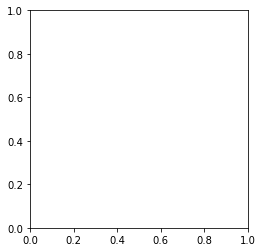

In [34]:
plt.imshow(Y_test[0],cmap=plt.cm.binary)